## **Predicción del Nivel de PIB utilizando Datos del Banco Mundial**

El objetivo de este proyecto es predecir el nivel de PIB de distintos países a partir de indicadores económicos, sociales y demográficos obtenidos del Banco Mundial.

El trabajo debe realizarse en tres etapas principales:

- Etapa 1: Análisis descriptivo e imputación de datos

- Etapa 2: Reducción de dimensionalidad con PCA

- Etapa 3: Modelación mediante algoritmos de clasificación

### **Etapa Previa**:

En github debe crear un repositorio llamado portfolios. Además debe crear tres ramas para cada una de las etapas. Recuerde que la rama  `main` debe contener todas las actualizaciones de su código por medio de una unión entre las ramas de las etapas junto con la rama principal.


En esta etapa inicial, se deberá configurar correctamente la estructura del proyecto utilizando GitHub como sistema de control de versiones.
- Crear un repositorio en GitHub con el nombre `portafolio`
- En el archivo `README.md` debe describir claramente la finalidad del proyecto. Puede apoyarse en las indicaciones descritas acá como referencia inicial; sin embargo, el contenido debe ser reformulado y contextualizado, de modo que el repositorio refleje un proyecto original, coherente y concebido por usted, tanto en su propósito como en su enfoque.
- A partir de la rama main, crear tres ramas, cada una asociada a una etapa del trabajo (por ejemplo: `etapa-1`, `etapa-2`, `etapa-3`). Cada rama deberá contener exclusivamente los avances correspondientes a su respectiva etapa.
- Realizar la extracción inicial de los datos desde la fuente del Banco Mundial y subir estos datos al repositorio en una carpeta denominada `main`.

**Indicaciones**
- Una vez finalizada cada etapa, los cambios desarrollados en la rama correspondiente deberán integrarse a la rama `main` mediante un proceso de unión (`merge`).
- La rama `main` debe reflejar, en todo momento, la versión más actualizada y consolidada del proyecto.


### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de aceurdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

In [ ]:
%pip install wbgapi

In [ ]:
# 1. Instalación de la librería (se ejecuta una sola vez)
!pip -q install wbgapi

# 2. Importaciones de librerías
import wbgapi as wb
import pandas as pd
import numpy as np

# 3. Definición de la función de descarga (la "máquina")
def descargar_en_chunks(indicadores, anos, chunk_size=15):
    keys = list(indicadores.keys())
    n = len(keys)
    dfs = []

    for i in range(0, n, chunk_size):
        bloque = keys[i:i+chunk_size]
        print(f"Descargando bloque {i//chunk_size + 1}: {bloque}")

        # Conexión al Banco Mundial y descarga
        df_temp = wb.data.DataFrame(
            series=bloque,
            time=anos,
            labels=True
        )
        dfs.append(df_temp)

    # Unir todos los dataframes descargados
    df_final = pd.concat(dfs, axis=1)

    # Eliminar columnas duplicadas
    df_final = df_final.loc[:, ~df_final.columns.duplicated()]

    # Resetear índice y renombrar columnas
    df_final = df_final.reset_index().rename(columns={'economy': 'country', 'time': 'year'})

    # Eliminar filas donde el PIB sea nulo
    df_final = df_final.dropna(subset=['NY.GDP.MKTP.PP.KD'])

    return df_final

# 4. Configuración de datos deseados
indicadores = {
    'NY.GDP.MKTP.PP.KD': 'PIB real (PPP, constant)',
    'SL.UEM.TOTL.ZS': 'Desempleo total (%)'
}
anos = range(2000, 2024) # Rango desde el año 2000 hasta 2023

# 5. EJECUCIÓN: Crear la base de datos
# En este punto el código se conecta a Internet y crea la tabla en memoria
df = descargar_en_chunks(indicadores, anos)

# 6. Verificación de resultados
print("\n--- Vista previa de la base de datos ---")
print(df.head()) # Muestra las primeras 5 filas
print("\n--- Tamaño de la tabla (filas, columnas) ---")
print(df.shape)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SL.UEM.TOTL.ZS']


KeyError: ['NY.GDP.MKTP.PP.KD']

In [ ]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/UDP-CcsDatos2025-2')

import my_func as fn

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [ ]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [ ]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [ ]:
#Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [ ]:
import pandas as pd
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [ ]:
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,2.052982,...,NaN,NaN,65.013,62.775,60.226,NaN,NaN,NaN,NaN,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,4.040607,...,NaN,NaN,68.673,66.349,63.936,NaN,NaN,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.769072,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.496492,...,36.077468,29.637136,79.264,74.588,69.877,NaN,NaN,75.8894,80.3200,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.942088,...,NaN,NaN,73.927,71.477,69.445,NaN,NaN,NaN,NaN,45.7313


In [3]:
pip install wbgapi

In [6]:
import wbgapi as wb
import pandas as pd
import numpy as np

# Re-defining indicators and iso_list to ensure they are available in this context
# (They were defined in previous cells but might not be in scope if earlier cells failed)
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)"
}

# Select only countries using ISO codes (from cell ggk6Ifi6e3vB)
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])


# Corrected function to download data for a single year in wide format
def descargar_wb_data_single_year_wide(indicators_dict, target_year, chunk_size=10):
    indicator_codes = list(indicators_dict.keys())
    all_df_chunks = []

    for i in range(0, len(indicator_codes), chunk_size):
        current_chunk_indicators = indicator_codes[i:i + chunk_size]
        print(f"Descargando bloque {int(i/chunk_size) + 1}: {current_chunk_indicators}")

        # wb.data.DataFrame with a list of series and a single time returns indicators as columns
        df_chunk = wb.data.DataFrame(
            series=current_chunk_indicators,
            time=target_year,
            labels=True # This adds 'Country' (country name) to each chunk
        )
        all_df_chunks.append(df_chunk)

    if not all_df_chunks:
        return pd.DataFrame()

    # Concatenate all dataframes horizontally. They should all have the same index (economy, time)
    # and different indicator columns.
    df_final = pd.concat(all_df_chunks, axis=1)

    # Remove duplicate columns (like 'Country' that might appear if labels=True is applied to each chunk and then concat)
    df_final = df_final.loc[:, ~df_final.columns.duplicated()]

    # Reset index to make 'economy' (country_code) and 'time' (year) into columns
    df_final = df_final.reset_index()

    # Rename columns for consistency
    df_final = df_final.rename(columns={'economy': 'country_code', 'time': 'year'})

    # Filter out rows where the target variable is NaN (GDP is null) as per initial instruction
    if 'NY.GDP.MKTP.PP.KD' in df_final.columns:
        df_final = df_final.dropna(subset=['NY.GDP.MKTP.PP.KD'])
    else:
        print("Warning: 'NY.GDP.MKTP.PP.KD' column not found in downloaded data. Cannot drop NaNs based on target.")

    return df_final

# 1. Download the data for the year 2023 into df_wb_raw
target_year = 2023
df_wb_raw = descargar_wb_data_single_year_wide(indicadores_wb, target_year=target_year, chunk_size=10)

# 2. Filter the DataFrame to include only non-aggregate countries (iso_list)
df_wb_raw = df_wb_raw[df_wb_raw['country_code'].isin(iso_list)].reset_index(drop=True)

# 3. Discretize the target variable 'NY.GDP.MKTP.PP.KD' as per instructions
if 'NY.GDP.MKTP.PP.KD' in df_wb_raw.columns:
    # Ensure the column is numeric before applying qcut, coercing errors to NaN
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.to_numeric(df_wb_raw['NY.GDP.MKTP.PP.KD'], errors='coerce')
    # Drop any new NaNs that might have resulted from coercion before qcut
    df_wb_raw.dropna(subset=['NY.GDP.MKTP.PP.KD'], inplace=True)

    if not df_wb_raw['NY.GDP.MKTP.PP.KD'].empty:
        df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(
            df_wb_raw['NY.GDP.MKTP.PP.KD'],
            q=5,
            labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']
        )
    else:
        print("Warning: 'NY.GDP.MKTP.PP.KD' became empty after cleaning/coercion. Skipping qcut.")
else:
    print("Warning: 'NY.GDP.MKTP.PP.KD' column not found, cannot apply qcut.")

# --- Now, perform the descriptive analysis as requested in the subtask ---
print("\n--- First 5 rows of the DataFrame ---")
print(df_wb_raw.head())

print("\n--- DataFrame Information ---")
df_wb_raw.info()

print("\n--- Shape of the DataFrame (rows, columns) ---")
print(df_wb_raw.shape)

print("\n--- Number of unique countries ---")
# The 'Country' column holds country names, and 'country_code' holds ISO codes
print(df_wb_raw['Country'].nunique())

print("\n--- Descriptive statistics for numerical variables ---")
# Exclude non-numerical columns and identifier columns from describe()
numerical_cols = df_wb_raw.select_dtypes(include=np.number).columns.tolist()
# 'year' is constant (2023) and 'country_code' is an identifier, so remove them from numerical stats
if 'year' in numerical_cols: numerical_cols.remove('year')
print(df_wb_raw[numerical_cols].describe())

print("\n--- Value counts for the target variable 'NY.GDP.MKTP.PP.KD' ---")
print(df_wb_raw['NY.GDP.MKTP.PP.KD'].value_counts())

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

## Handle Missing Data

### Subtask:
Calculate the percentage of missing values for each variable. Drop columns with 15% or more missing data. For columns with less than 15% missing data, impute numerical variables with the median and categorical variables with the mode.


**Reasoning**:
The first step is to calculate the percentage of missing values for each column in the `df_wb_raw` DataFrame to determine which columns need to be dropped or imputed.



In [7]:
missing_percentage = df_wb_raw.isnull().sum() * 100 / len(df_wb_raw)
print("--- Percentage of missing values per column ---")
print(missing_percentage.sort_values(ascending=False).head(20))

--- Percentage of missing values per column ---
SE.PRM.NENR.FE          100.000000
SE.PRM.NENR.MA          100.000000
SE.PRM.NENR             100.000000
GC.TAX.EXPT.ZS           83.333333
GC.TAX.EXPT.CN           83.333333
GC.DOD.TOTL.CN           82.828283
GC.DOD.TOTL.GD.ZS        82.828283
IT.NET.USER.FE.ZS        71.212121
IT.NET.USER.MA.ZS        71.212121
EG.ELC.LOSS.ZS           64.646465
EG.USE.ELEC.KH.PC        64.141414
SL.UEM.TOTL.FE.NE.ZS     46.969697
SL.UEM.TOTL.NE.ZS        46.969697
SL.UEM.TOTL.MA.NE.ZS     46.969697
SE.TER.ENRR.MA           38.383838
SE.TER.ENRR.FE           38.383838
SE.TER.ENRR              37.878788
SE.SEC.ENRR.MA           32.323232
SE.SEC.ENRR.FE           31.818182
SE.SEC.ENRR              30.303030
dtype: float64


**Reasoning**:
Based on the calculated missing percentages, identify columns with 15% or more missing values and drop them from the DataFrame as per the subtask instructions.



In [8]:
cols_to_drop_high_nan = missing_percentage[missing_percentage >= 15].index.tolist()
# Exclude 'NY.GDP.MKTP.PP.KD' from being dropped if it's in the list, as it's the target variable and has already been handled.
if 'NY.GDP.MKTP.PP.KD' in cols_to_drop_high_nan:
    cols_to_drop_high_nan.remove('NY.GDP.MKTP.PP.KD')
df_wb_raw = df_wb_raw.drop(columns=cols_to_drop_high_nan)
print(f"Dropped {len(cols_to_drop_high_nan)} columns with >= 15% missing values.")
print("Current shape of DataFrame:", df_wb_raw.shape)

Dropped 26 columns with >= 15% missing values.
Current shape of DataFrame: (198, 41)


**Reasoning**:
Now that columns with high percentages of missing values have been dropped, the next step is to impute the remaining missing values in numerical columns with the median and in categorical columns with the mode, as per the subtask instructions.



In [9]:
print("--- Imputing remaining missing values ---")

# Identify numerical and categorical columns for imputation
missing_numerical_cols = df_wb_raw.select_dtypes(include=np.number).columns[df_wb_raw.select_dtypes(include=np.number).isnull().any()].tolist()
missing_categorical_cols = df_wb_raw.select_dtypes(include=['object', 'category']).columns[df_wb_raw.select_dtypes(include=['object', 'category']).isnull().any()].tolist()

# Impute numerical columns with the median
for col in missing_numerical_cols:
    median_val = df_wb_raw[col].median()
    df_wb_raw[col].fillna(median_val, inplace=True)
    print(f"Imputed numerical column '{col}' with median: {median_val}")

# Impute categorical columns with the mode
for col in missing_categorical_cols:
    # Mode might return multiple values if there's a tie, so take the first one.
    mode_val = df_wb_raw[col].mode()[0]
    df_wb_raw[col].fillna(mode_val, inplace=True)
    print(f"Imputed categorical column '{col}' with mode: {mode_val}")

print("\n--- Verifying no more missing values ---")
print(df_wb_raw.isnull().sum().sum())

print("\n--- DataFrame Information after imputation ---")
df_wb_raw.info()

--- Imputing remaining missing values ---
Imputed numerical column 'SL.TLF.TOTL.FE.ZS' with median: 45.0819446527757
Imputed numerical column 'SL.TLF.TOTL.IN' with median: 4220673.0
Imputed numerical column 'SL.UEM.TOTL.FE.ZS' with median: 5.532
Imputed numerical column 'SL.UEM.TOTL.MA.ZS' with median: 4.608
Imputed numerical column 'SP.RUR.TOTL.ZG' with median: 0.415638967378448
Imputed numerical column 'FP.CPI.TOTL.ZG' with median: 5.87110177678988
Imputed numerical column 'NE.EXP.GNFS.ZS' with median: 37.8166476493913
Imputed numerical column 'NV.AGR.TOTL.CD' with median: 3465342538.48272
Imputed numerical column 'NV.AGR.TOTL.CN' with median: 39711718990.7585
Imputed numerical column 'NV.IND.MANF.CD' with median: 4795876698.625574
Imputed numerical column 'SL.UEM.TOTL.ZS' with median: 5.094
Imputed numerical column 'GE.EST' with median: -0.0595627073198557
Imputed numerical column 'NV.IND.MANF.CN' with median: 113027246500.0
Imputed numerical column 'NV.IND.TOTL.CD' with median: 114

/tmp/ipython-input-41635234.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_wb_raw[col].fillna(median_val, inplace=True)


**Reasoning**:
Now that all missing values have been handled, the next step in the descriptive analysis is to identify outliers in the numerical variables as per the subtask instructions. This will be done using the Interquartile Range (IQR) method.



In [10]:
print("--- Identifying Outliers (IQR Method) ---")

numerical_cols = df_wb_raw.select_dtypes(include=np.number).columns.tolist()

outliers_found = {}

for col in numerical_cols:
    Q1 = df_wb_raw[col].quantile(0.25)
    Q3 = df_wb_raw[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    col_outliers = df_wb_raw[(df_wb_raw[col] < lower_bound) | (df_wb_raw[col] > upper_bound)]

    if not col_outliers.empty:
        outliers_found[col] = len(col_outliers)
        print(f"Column '{col}': {len(col_outliers)} outliers detected.")

if not outliers_found:
    print("No significant outliers detected in numerical columns based on IQR method.")
else:
    print("\nSummary of outliers detected:")
    for col, count in outliers_found.items():
        print(f"- {col}: {count} outliers")

--- Identifying Outliers (IQR Method) ---
Column 'SP.POP.GROW': 8 outliers detected.
Column 'SP.POP.TOTL': 20 outliers detected.
Column 'SP.POP.TOTL.FE.IN': 22 outliers detected.
Column 'SP.POP.TOTL.FE.ZS': 19 outliers detected.
Column 'SP.POP.TOTL.MA.IN': 20 outliers detected.
Column 'SP.POP.TOTL.MA.ZS': 19 outliers detected.
Column 'SP.URB.GROW': 3 outliers detected.
Column 'SP.URB.TOTL': 25 outliers detected.
Column 'SL.TLF.TOTL.FE.ZS': 20 outliers detected.
Column 'SL.TLF.TOTL.IN': 29 outliers detected.
Column 'SL.UEM.TOTL.FE.ZS': 17 outliers detected.
Column 'SL.UEM.TOTL.MA.ZS': 16 outliers detected.
Column 'SP.RUR.TOTL': 22 outliers detected.
Column 'SP.RUR.TOTL.ZG': 9 outliers detected.
Column 'FP.CPI.TOTL.ZG': 21 outliers detected.
Column 'NE.EXP.GNFS.ZS': 11 outliers detected.
Column 'NV.AGR.TOTL.CD': 29 outliers detected.
Column 'NV.AGR.TOTL.CN': 38 outliers detected.
Column 'NV.IND.MANF.CD': 35 outliers detected.
Column 'SL.UEM.TOTL.ZS': 17 outliers detected.
Column 'NV.IND.

**Reasoning**:
The next step is to visualize the distribution of the discretized target variable 'NY.GDP.MKTP.PP.KD' using a bar chart, as specified in the subtask. This will provide insights into the balance and distribution of the GDP categories.



--- Visualizing the distribution of 'NY.GDP.MKTP.PP.KD' (Discretized PIB) ---


/tmp/ipython-input-2773191504.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_wb_raw, x='NY.GDP.MKTP.PP.KD', palette='viridis', order=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])


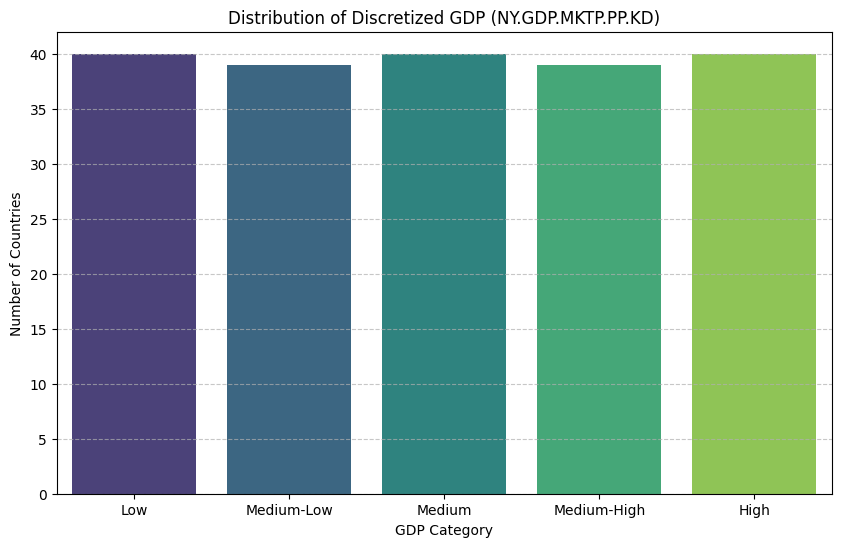

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Visualizing the distribution of 'NY.GDP.MKTP.PP.KD' (Discretized PIB) ---")

plt.figure(figsize=(10, 6))
sns.countplot(data=df_wb_raw, x='NY.GDP.MKTP.PP.KD', palette='viridis', order=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
plt.title('Distribution of Discretized GDP (NY.GDP.MKTP.PP.KD)')
plt.xlabel('GDP Category')
plt.ylabel('Number of Countries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Reasoning**:
The previous code block generated a `FutureWarning` from seaborn regarding the use of `palette` without `hue` in `countplot`. To fix this and ensure compatibility with future seaborn versions, I will explicitly set `hue` to the same variable as `x` and set `legend=False` as suggested by the warning.



--- Visualizing the distribution of 'NY.GDP.MKTP.PP.KD' (Discretized PIB) ---


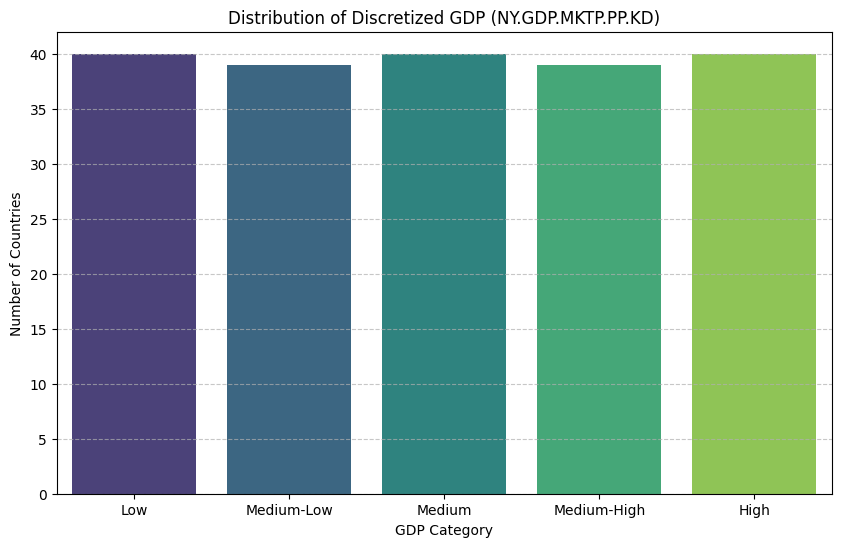

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Visualizing the distribution of 'NY.GDP.MKTP.PP.KD' (Discretized PIB) ---")

plt.figure(figsize=(10, 6))
sns.countplot(data=df_wb_raw, x='NY.GDP.MKTP.PP.KD', hue='NY.GDP.MKTP.PP.KD', palette='viridis', order=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'], legend=False)
plt.title('Distribution of Discretized GDP (NY.GDP.MKTP.PP.KD)')
plt.xlabel('GDP Category')
plt.ylabel('Number of Countries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Reasoning**:
The final visualization requested by the subtask is a choropleth map showing the geographical distribution of the discretized GDP. This step will use `plotly.express` to create an interactive map, mapping the `country_code` to show the 'NY.GDP.MKTP.PP.KD' categories.



In [13]:
import plotly.express as px

print("--- Creating a Choropleth Map for Discretized GDP Distribution ---")

fig = px.choropleth(
    df_wb_raw,
    locations="country_code",
    color="NY.GDP.MKTP.PP.KD",
    hover_name="Country",
    color_discrete_map={
        'Low': 'red',
        'Medium-Low': 'orange',
        'Medium': 'yellow',
        'Medium-High': 'lightgreen',
        'High': 'darkgreen'
    },
    category_orders={"NY.GDP.MKTP.PP.KD": ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']},
    title='Geographical Distribution of Discretized GDP (2023)',
    projection='natural earth'
)
fig.show()


--- Creating a Choropleth Map for Discretized GDP Distribution ---
